<a href="https://colab.research.google.com/github/ronakbihani123/supervised_ml_algorithms/blob/main/knn_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

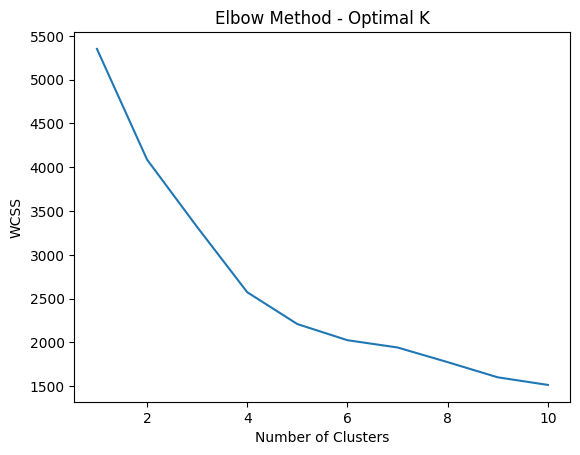

   age     sex     bmi  children smoker     region      charges  Cluster
0   19  female  27.900         0    yes  southwest  16884.92400        0
1   18    male  33.770         1     no  southeast   1725.55230        0
2   28    male  33.000         3     no  southeast   4449.46200        2
3   33    male  22.705         0     no  northwest  21984.47061        0
4   32    male  28.880         0     no  northwest   3866.85520        0


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("/content/insurance.csv")

numeric_df = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
a = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="k-means++", random_state=42)
    km.fit(scaled_data)
    a.append(km.inertia_)

plt.plot(range(1, 11), a)
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3, init="k-means++" , random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters
print(df.head())


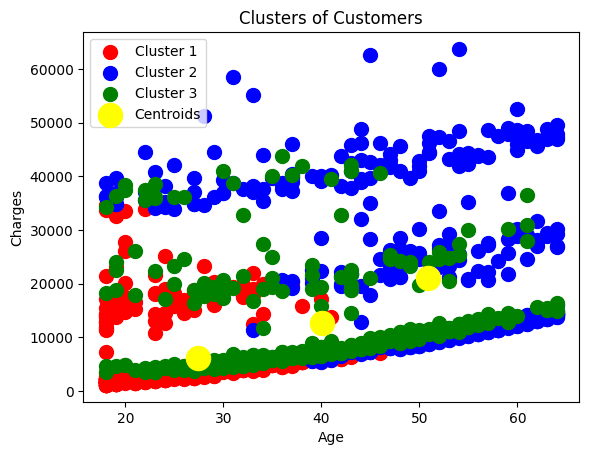

In [ ]:
# Scatter plot for clusters
plt.scatter(numeric_df.iloc[clusters == 0, 0], numeric_df.iloc[clusters == 0, 3],
            s=100, c="red", label="Cluster 1")

plt.scatter(numeric_df.iloc[clusters == 1, 0], numeric_df.iloc[clusters == 1, 3],
            s=100, c="blue", label="Cluster 2")

plt.scatter(numeric_df.iloc[clusters == 2, 0], numeric_df.iloc[clusters == 2, 3],
            s=100, c="green", label="Cluster 3")

# Centroids values (remember: centroids exist in scaled space)
centers = scaler.inverse_transform(kmeans.cluster_centers_)   # convert back to original scale
plt.scatter(centers[:, 0], centers[:, 3],
            s=300, c="yellow", label="Centroids")

plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()
